# ECE 311 Lab Final:

## Due Date: Tuesday, 12/12 @ 11:59PM
### Note: a 10% penalty will be applied for each hour your submission is late!

This lab final will review the import concepts from the course. Much of this lab should be familiar from previous labs. We encourage you to look back on your previous labs to remind you how to produce your results and evaluate their correctness. Enough talking, let's get started!

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from scipy import signal
from pz_plot import pz_plot
from scipy.io import wavfile
from numpy.random import randn
from IPython.display import Audio

#Utility function for dB scaling of magnitude spectra
def sig2db(mag_spec):
    return 20*np.log10(mag_spec)

%matplotlib inline

# Exercise 1: Building an Edge Detector 2.0

In Lab 2 Exercise 4, we built a simple edge detector by applying a high-pass filter along the rows and columns of an image, then combined the two results to create an image of detected edges. In this exercise, we will build a more sophisticated edge detector by adding onto our original design. This improved detector is known as the [Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator).

The Sobel operator uses the same intuition of finding horizontal and vertical edges separately, then combining these results to form the image. Let $G_x$ be our resulting image from detecting vertical edges (through the x-axis) and $G_y$ be our resulting image from detecting horizontal edges (through the y-axis, then our final result will be given by

$$
G[i,j] = \sqrt{G^2_x[i,j]+G^2_y[i,j]},
$$

where $G[i,j]$ is the pixel value at row $i$, column $j$. We compute $G_x$ and $G_y$ via convolution as follows:

$$
G_x = I * \begin{bmatrix}
1 & 0 & -1\\
\end{bmatrix} * \begin{bmatrix}
1\\
2\\
1\\
\end{bmatrix}
$$

$$
G_y = I * \begin{bmatrix}
1\\
0\\
-1\\
\end{bmatrix} * \begin{bmatrix}
1 & 2 & 1\\
\end{bmatrix},
$$

where $I$ is our original image and $*$ denotes the convolution operator. Note that in the computation of $G_x$ we convolve along the rows with a high-pass filter and convolve along the columns with a low-pass filter, while the computation of $G_y$ reverses this relationship with the same filters.

a. Compute the image $G_x$ by performing the two convolutions along the rows and columns, respectively, using $\textrm{signal.convolve()}$. Plot your resulting image in grayscale. Remember that you should apply the high-pass filter $\begin{bmatrix}1 & 0 & -1\end{bmatrix}$ to each **row** and the low-pass filter $\begin{bmatrix}1 & 2 & 1\end{bmatrix}$ to each **column**. Also, be sure to use the "same" mode when using $\textrm{signal.convolve()}$.

b. Compute the image $G_y$ by performing the two convolutions along the rows and columns, respectively, using $\textrm{signal.convolve()}$. Plot your resulting image in grayscale. Remember that you should apply the high-pass filter $\begin{bmatrix}1 & 0 & -1\end{bmatrix}$ to each **column** and the low-pass filter $\begin{bmatrix}1 & 2 & 1\end{bmatrix}$ to each **row**.

c. Create final result image $G$ according to the above formulation. Plot your resulting image in grayscale.

(-0.5, 564.5, 351.5, -0.5)

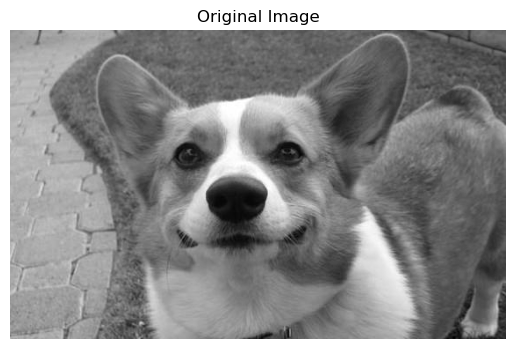

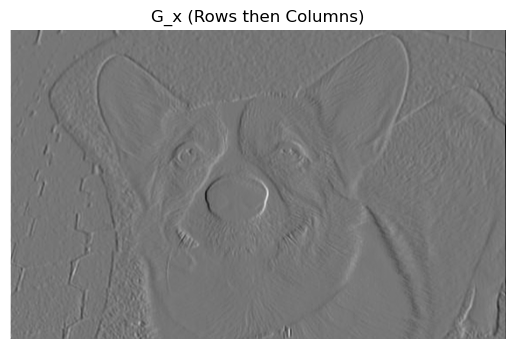

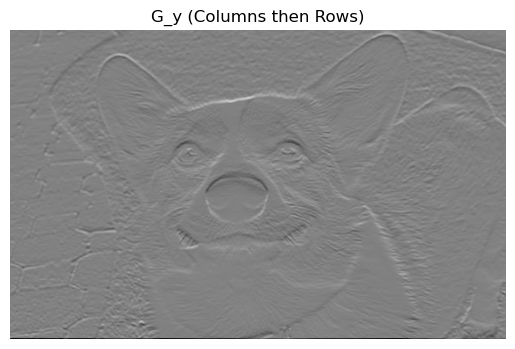

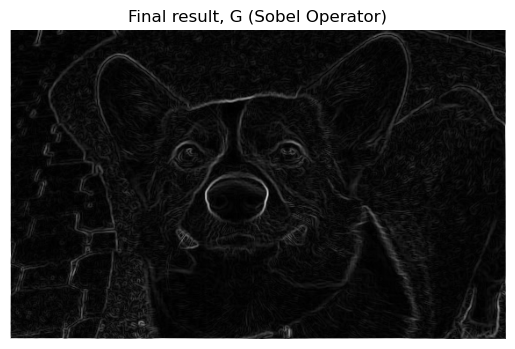

In [23]:
#load test-image.jpg
image = imread('test-image.jpg')
n_rows,n_cols = image.shape
plt.figure()
plt.imshow(image, 'gray')
plt.axis('off')
plt.title("Original Image")
#Code for part a.
high = np.array([1,0,-1]) #create the high pass filter
low = np.array([1,2,1]) #create the low pass filter
G_x = np.zeros(image.shape)
for i in range(n_rows):
    G_x[i,:] = signal.convolve(image[i,:], high, 'same') #convolve on rows first
for j in range(n_cols):
    G_x[:,j] = signal.convolve(G_x[:,j], low, 'same') #convolve on columns second
plt.figure()
plt.imshow(G_x, 'gray')
plt.title("G_x (Rows then Columns)")
plt.axis('off') #make it clean by just removing the axis


#Code for part b:
G_y = np.zeros(image.shape)
for j in range(n_cols):
    G_y[:,j] = signal.convolve(image[:,j], high, 'same') #convolve on columns first
for i in range(n_rows):
    G_y[i,:] = signal.convolve(G_y[i,:], low, 'same') #convolve on rows second
plt.figure()
plt.imshow(G_y, 'gray')
plt.title("G_y (Columns then Rows)")
plt.axis('off')


#Code for part c:
G = np.zeros(image.shape)
for i in range(n_rows):
    for j in range(n_cols):
        G[i][j] = np.sqrt((G_x[i][j])**2 + (G_y[i][j])**2) #im using the quation provided above
plt.figure()
plt.imshow(G, 'gray')
plt.title("Final result, G (Sobel Operator)")
plt.axis('off')


# Exercise 2: LCCDE, Transfer Function, and Impulse Response

For each of the following Linear Constant Coefficient Difference Equations (LCCDE), determine the transfer function (numerator and denominator coefficients) in order to plot both the pole-zero plot and impulse response of the system for the requested number of points. **Please plot your impulse responses as a stem plot!** For each system, indicate whether it is BIBO stable, marginally stable, or not BIBO stable and briefly explain your choice.

Note: We have provided the $\textrm{pz_plot}()$ function from Lab 3 to create your pole-zero plots. Refer to Lab 3 for usage of this function. Some other functions of interest you may want to use from Lab 3 will be $\textrm{signal.dimpulse()}$ and $\textrm{signal.tf2zpk()}$.

a. $y_1[n] = \frac{1}{3}x[n]-2x[n-1]+x[n-2]-
2x[n-3]+\frac{1}{3}x[n-4],\quad 0\leq n < 8$

b. $y_2[n] = x[n] + \frac{1}{4}x[n-2] - 2y_2[n-1] + 3y_2[n-2],\quad 0\leq n < 20$

c. $y_3[n] = x[n] - \frac{1}{2}x[n-2] - y_3[n-3], \quad 0\leq n < 20$

Text(0, 0.5, 'h[n]')

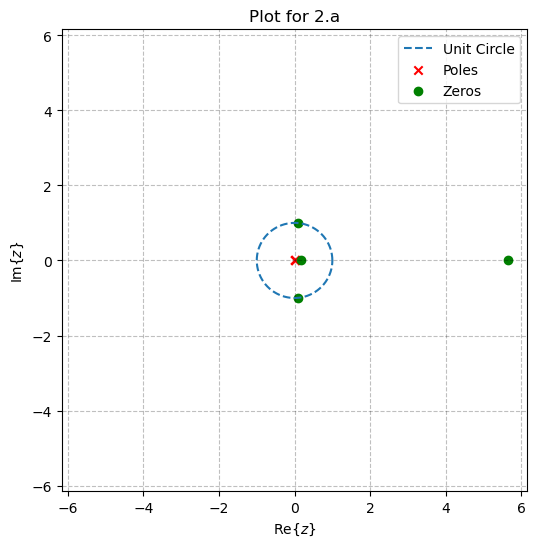

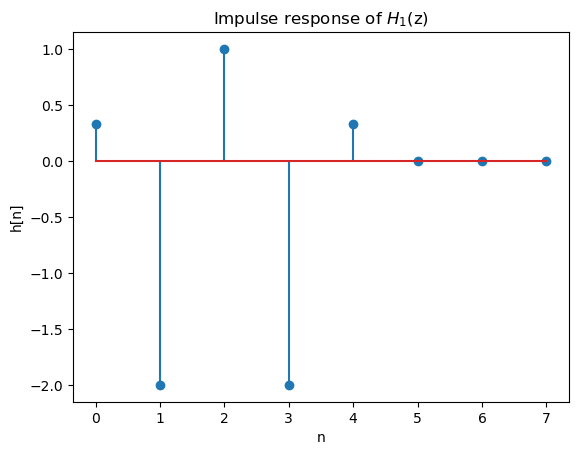

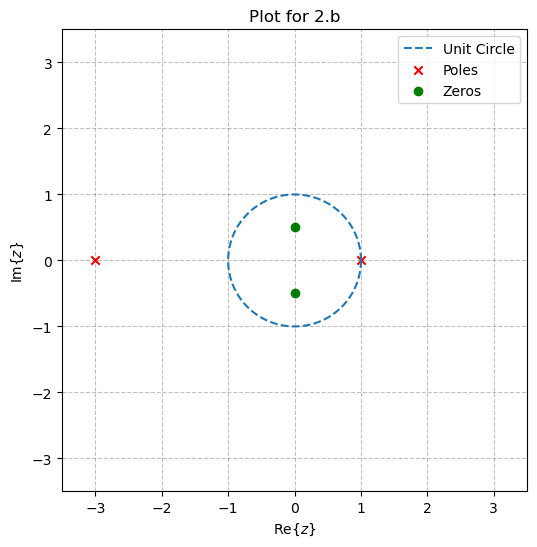

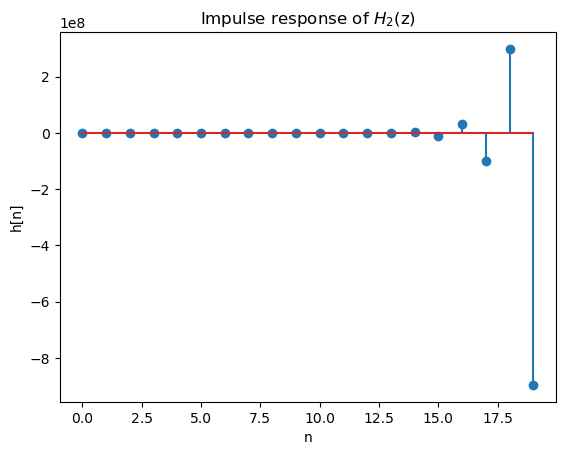

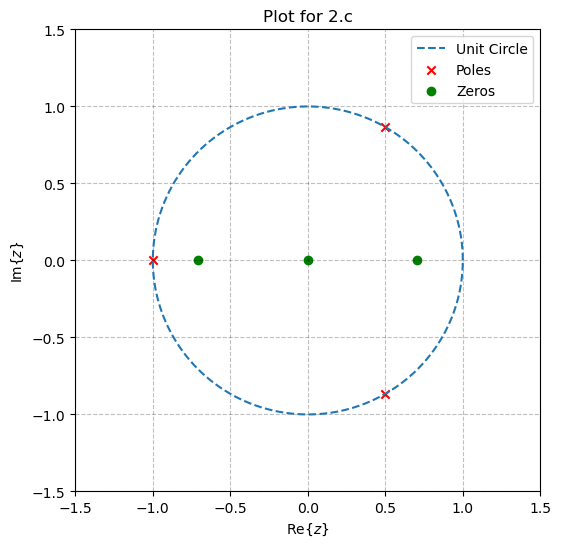

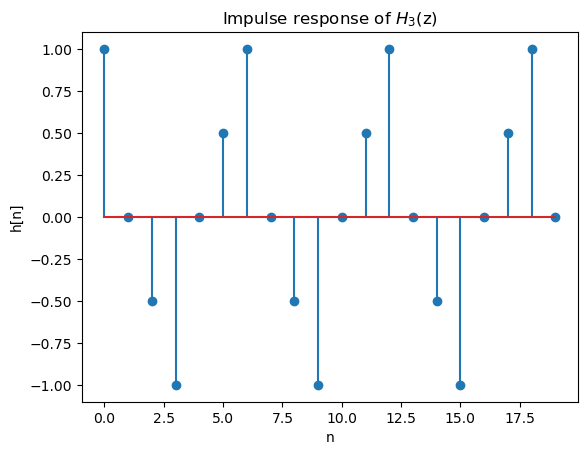

In [9]:
#Code for exercise 2:
#a)
b_a = [1/3,-2,1,-2,1/3] #numerator of our transfer function (H(z))
a_a = [1,0,0,0,0] #denominator of our transfer functino (H(z))
z_a, p_a, k_a = signal.tf2zpk(b_a, a_a)
pz_plot(z_a, p_a, "Plot for 2.a")
n,y = signal.dimpulse((b_a, a_a, 1), n=8) # the 1 is for the change in time per sample (we need to se n=8 since thats our range)
h_a = y[0] # need to access output from returned object
plt.figure()
plt.stem(n, h_a)
plt.title("Impulse response of $H_1$(z)")
plt.xlabel("n")
plt.ylabel("h[n]")

#b)
b_b = [1,0,1/4] #numerator of our transfer function (H(z))
a_b = [1,2,-3] #denominator of our transfer functino (H(z))
z_b, p_b, k_b = signal.tf2zpk(b_b, a_b)
pz_plot(z_b, p_b, "Plot for 2.b")
n,y = signal.dimpulse((b_b, a_b, 1), n=20) # the 1 is for the change in time per sample (we need to se n=8 since thats our range)
h_b = y[0] # need to access output from returned object
plt.figure()
plt.stem(n, h_b)
plt.title("Impulse response of $H_2$(z)")
plt.xlabel("n")
plt.ylabel("h[n]")

#c)
b_c = [1, 0, -1/2,0] #numerator of our transfer function (H(z))
a_c = [1,0,0,1] #denominator of our transfer functino (H(z))
z_c, p_c, k_c = signal.tf2zpk(b_c, a_c)
pz_plot(z_c, p_c, "Plot for 2.c")
n,y = signal.dimpulse((b_c, a_c, 1), n=20) # the 1 is for the change in time per sample (we need to se n=8 since thats our range)
h_c = y[0] # need to access output from returned object
plt.figure()
plt.stem(n, h_c)
plt.title("Impulse response of $H_3$(z)")
plt.xlabel("n")
plt.ylabel("h[n]")

## Comments here
indicate whether it is BIBO stable, marginally stable, or not BIBO stable and briefly explain your choice.
Comments for 2.a:
This system is BIBO stable because it has all of its poles within the unit circle.

Comments for 2.b:
This system is NOT BIBO stable because it has poles that lie outside the unit circle.

Comments for 2.c:
This system is Marginally stable because all of its poles lie on the unit circle.


# Exercise 3: Windows and Spectral Resolution

**Note: please specify 512 points for each FFT you take in this problem!**

a. Plot the magnitude spectrum (not dB scale) of the following signal using $\textrm{np.fft.rfft()}$.

$$
x_1[n] = 0.5\sin\left(0.5\pi n\right) + 0.02\sin\left(0.6\pi n\right), \quad 0\leq n < 80
$$

What is happening to the second sinusoid with the smaller magnitude in the frequency domain? Is it easy to locate this frequency peak?

b. Fill in the function $\textrm{hamming()}$ below which applies a Hamming window to an input signal. Apply this function to $x_1[n]$ and plot the resulting magnitude spectrum. Is it easier to locate the smaller frequency now?

c. Now let's try resolving two close, but equally large frequency peaks in the below signal $x_2[n]$.

$$
x_2[n] = 0.5\sin\left(0.6\pi n\right) + 0.5\sin\left(0.618\pi n\right), \quad 0\leq n < 80
$$

Plot the magnitude spectrum of $x_2[n]$ (not dB scale) before and after applying the $\textrm{hamming()}$ function. Is it easier to differentiate between the two peaks after applying the Hamming window? Why or why not? **Hint: think about the tradeoff between rectangular and Hamming windows!**


Text(0.5, 1.0, 'Magnitude Spectrum of $X_2$(w) with Hamming Window')

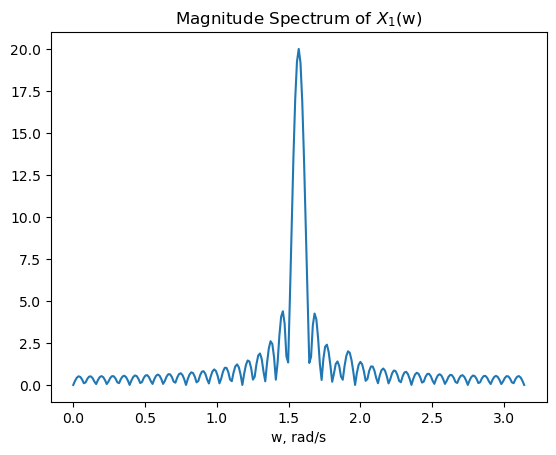

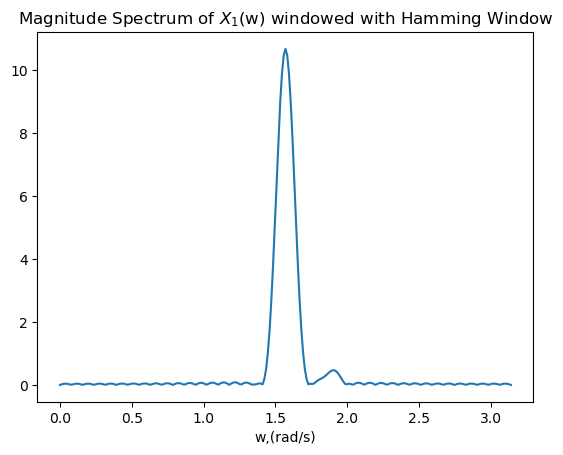

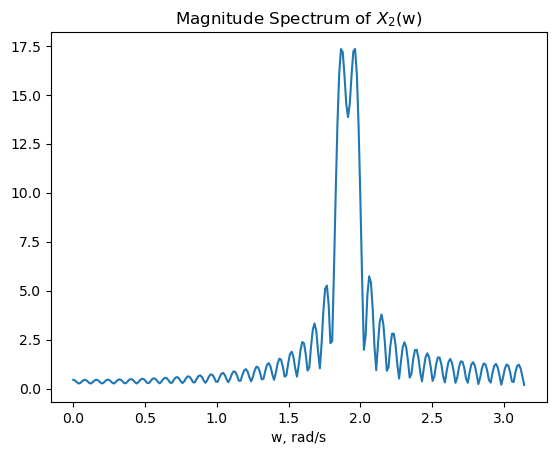

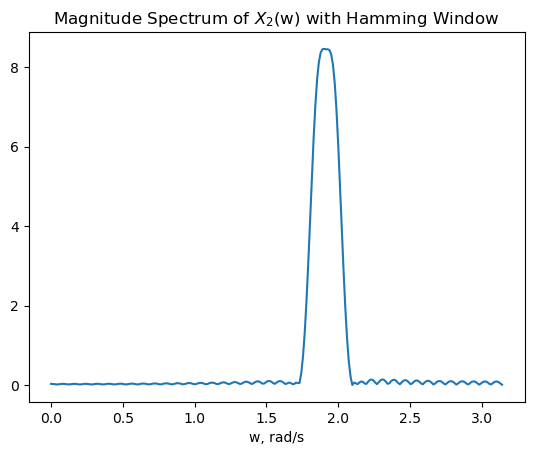

In [39]:
#Code for part 3.a:
def w(length):
    return np.linspace(0, np.pi, length) #quick helper function to get an axis for the frequency plots
x_1 = np.array([0.5*np.sin(0.5*np.pi*n) + 0.02*np.sin(0.6*np.pi*n) for n in range(80)]) #we are creating the list of values for x_1
fft_x1 = np.fft.rfft(x_1, 512)
plt.figure()
plt.plot(w(len(fft_x1)), np.abs(fft_x1))
plt.xlabel('w, rad/s')
plt.title('Magnitude Spectrum of $X_1$(w)')

#Code for part 3.b:
def hamming(x):
    #apply a hamming window to the signal
    windowed_signal = x* np.hamming(len(x))
    return windowed_signal
windowed_x1 = hamming(x_1)
windowed_fft1 = np.fft.rfft(windowed_x1, 512)

plt.figure()
plt.plot(w(len(windowed_fft1)), np.absolute(windowed_fft1))
plt.xlabel('w,(rad/s)')
plt.title('Magnitude Spectrum of $X_1$(w) windowed with Hamming Window')
#Code for part 3.c:
x_2 = np.array([0.5*np.sin(0.6*np.pi*n)+ 0.5*np.sin(0.618*np.pi*n) for n in range(80)])

#fft without window
fft_x2 = np.fft.rfft(x_2, 512)
plt.figure()
plt.plot(w(len(fft_x2)), np.abs(fft_x2))
plt.xlabel('w, rad/s')
plt.title('Magnitude Spectrum of $X_2$(w)')

#fft with window
windowed_x2 = hamming(x_2)
windowed_fft2 = np.fft.rfft(windowed_x2, 512)
plt.figure()
plt.plot(w(len(windowed_fft2)), np.absolute(windowed_fft2))
plt.xlabel('w, rad/s')
plt.title('Magnitude Spectrum of $X_2$(w) with Hamming Window')



## Comments here

Comments for part 3.a:
The second sinusoid appears to have mixed in the side lobe attenuation of the main peak. This makes it very hard to see.

Comments for part 3.b:
We are now able to easily notice the second peak after applying the Hamming window, but this new lobe is still very small.

Comments for part 3.c:
In the original frequency spectrum, we can easily tell that there is two seperate peaks that have combined together. However, after applying the Hamming window, we can not discern the fact that there is two peaks in the frequency spectrum. It almost smooths out the twin peaks and makes it seem as if x2 has only one sinusoid.


# Exercise 4: Chirp Redux

For this exercise, we will revisit the chirp activity from Lab 4 but this time with the help of spectrograms to visualize our chirps. The below provided code creates a five second long chirp signal with sampling rate $f_s = 44,100~Hz$ and maximum signal frequency $22,050~Hz$. Recall that the $\textrm{signal.chirp}$ function linearly sweeps between the requested frequencies over the set time interval. Hint: referring back to Labs 4 and 5 will help with understanding the chirp function and plotting spectrograms, respectively.

a. Plot the spectrogram of the original chirp signal we have generated for you.

b. Reduce the sampling rate of the original chirp signal by a factor of 9. Plot the resulting spectrogram and explain what you see. If we listened to this audio signal, how many rises and falls would you hear? **Note: you may either create a new chirp signal using the requested lower sampling or perform downsampling without an anti-aliasing filter.**

4900


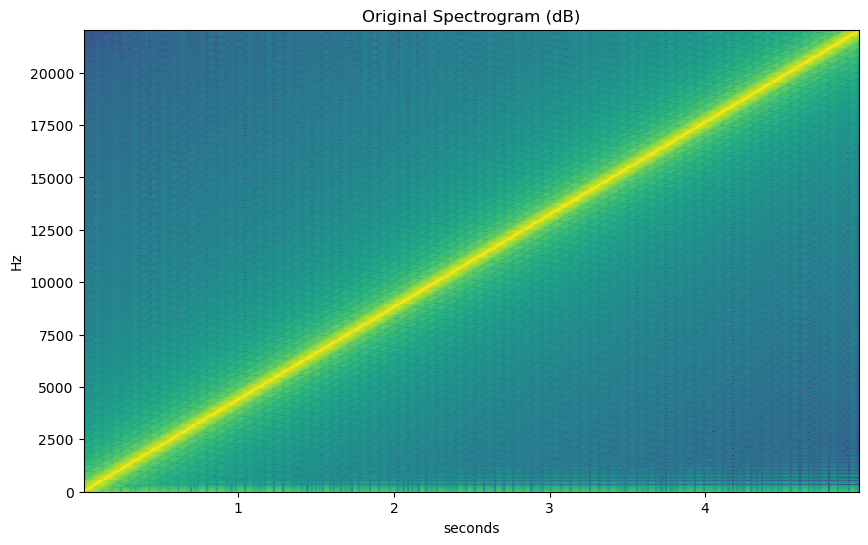

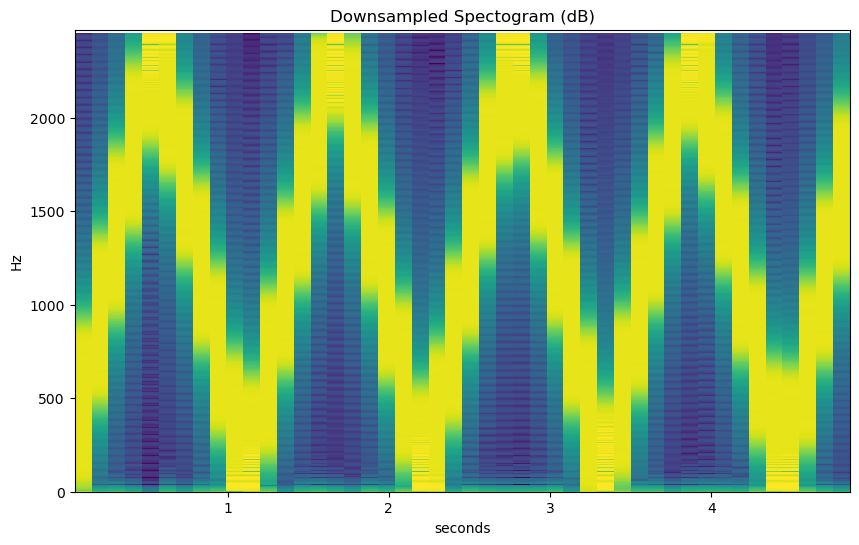

In [40]:
Fs = 44100 #sampling rate for audio clip in Hz
t1 = 5 #make clips 5 seconds
t = np.linspace(0,t1,t1*Fs)
f0 = 0 #start frequency (Hz)
f1 = 22050 #end frequency (Hz)
chirp_original = signal.chirp(t, f0 = f0, t1 = t1, f1 = f1)
nfft = 1024

#Code for part 4.a:
f, t, S = signal.spectrogram(chirp_original, Fs, nperseg = nfft, noverlap = int(nfft/2), nfft = nfft)

plt.figure(figsize=(10,6))
plt.pcolormesh(t, f, 20*np.log10(S))
plt.ylim([0, 22050])
plt.xlabel('seconds')
plt.ylabel('Hz')
plt.title('Original Spectrogram (dB)')

#Code for part 4.b:
new_freq = int(Fs/9)
t = np.linspace(0,t1,t1*(new_freq))
downsampled_chirp = signal.chirp(t, f0=f0, t1=t1, f1=f1)

f, t, S = signal.spectrogram(downsampled_chirp, (new_freq), nperseg = nfft, noverlap = int(nfft/2), nfft = nfft)

plt.figure(figsize=(10,6))
plt.pcolormesh(t, f, 20*np.log10(S))
plt.ylim([0, 2470])
plt.xlabel('seconds')
plt.ylabel('Hz')
plt.title('Downsampled Spectogram (dB)')
print(new_freq)

In [41]:
Audio(data=chirp_original, rate=Fs) # give it a listen

In [42]:
Audio(data=downsampled_chirp, rate=Fs/9) # you can hear the oscillation in frequency

## Comments here

Comments for 4.b:

From the spectogram, I see that our frequency rises and falls drastically. This could the chirp's frequency starts to repeat as it passes the digital frequency of pi. I count 5 rises and 4 drops when I hear the new downsampled chirp. This agrees with what we also see in the graph plotted above.

# Exercise 5: FIR Filter Design

a. Given the audio signal file ``Sound_original.wav``, compute and display the full FFT magnitude spectrum (no dB scale). Try listening to it!

b. Now let's assume that we pass this audio signal into a system described as followed.

<img src="./sys_illus.png" alt="Drawing" style="width: 600px;"/>

where $x[n]$ is our audio signal, $H(\omega)$ is an LTI system with impulse response $h[n]$, $d[n]$ is some noise, and $y[n]$ is the ouput. 
For this question, we want to simulate the ouput result $y[n]$.

We only know that the LTI system $H(\omega)$ is acting like a low-pass filter with a cutoff frequency of $\frac{\pi}{3}$. Use $\textrm{signal.remez()}$ to obtain the impulse response of this system assuming the filter length is $N = 100$ and the transition bandwidth is $\frac{\pi}{10}$. Plot magnitude response **on a dB scale** using the provided $\textrm{sig2db()}$ function. 

c. Now, we can obtain output $y[n]$ by filtering $x[n]$ with $h[n]$ and adding $d[n]$ after filtering. 

Here, $d[n]$ is assumed to be additive white Gaussian noise (AWGN). We can create our noise $d[n]$ by typing

``d = 2500 * np.random.randn(len(x_filtered))``

Compute $y[n]$ by summing your filtered audio signal $x[n]*h[n]$ and d. Try listening to y! Plot the FFT magnitude spectrum of $d[n]$ and the FFT magnitude spectrum of $y[n]$ on separate figures (no dB scale). Judging from these two graphs, do you think the simple filtering methods we have discussed in class will be able to perfectly separate our noise $d[n]$ from the filtered audio $x[n]*h[n]$?

<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:30: SyntaxWarning: invalid escape sequence '\o'
<>:39: SyntaxWarning: invalid escape sequence '\o'
<>:45: SyntaxWarning: invalid escape sequence '\o'
<>:52: SyntaxWarning: invalid escape sequence '\o'
<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:30: SyntaxWarning: invalid escape sequence '\o'
<>:39: SyntaxWarning: invalid escape sequence '\o'
<>:45: SyntaxWarning: invalid escape sequence '\o'
<>:52: SyntaxWarning: invalid escape sequence '\o'
C:\Users\rohan\AppData\Local\Temp\ipykernel_19888\1069018342.py:16: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Radians ($\omega$) (from 0 to $\pi$)')
C:\Users\rohan\AppData\Local\Temp\ipykernel_19888\1069018342.py:30: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('$\omega$')
C:\Users\rohan\AppData\Local\Temp\ipykernel_19888\1069018342.py:39: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('$\omega$')
C:\Users\rohan\AppData\Local\Temp\ipykernel_19888\1

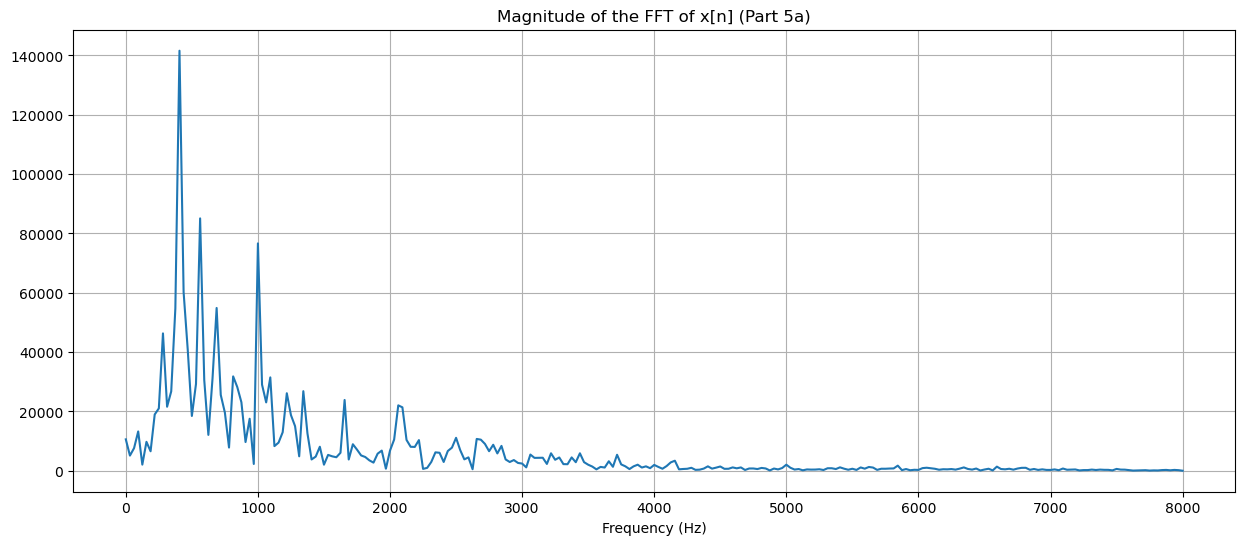

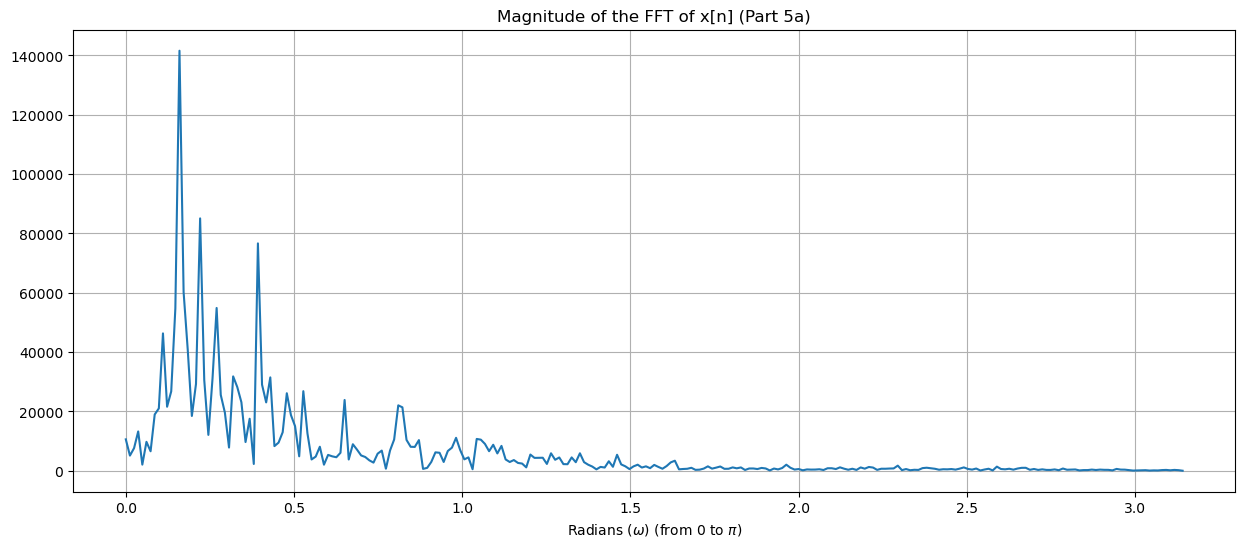

C:\Users\rohan\AppData\Local\Temp\ipykernel_19888\2548086727.py:13: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(mag_spec)


Text(0.5, 1.0, 'Magnitude of the FFT of the distorted plus filtered audio (Part 5c)')

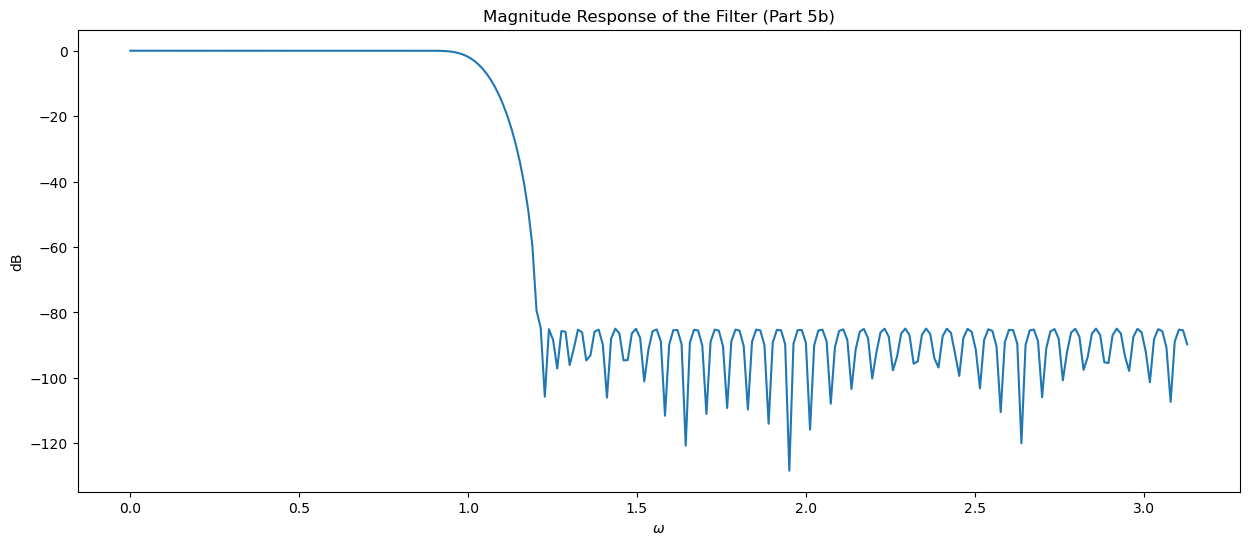

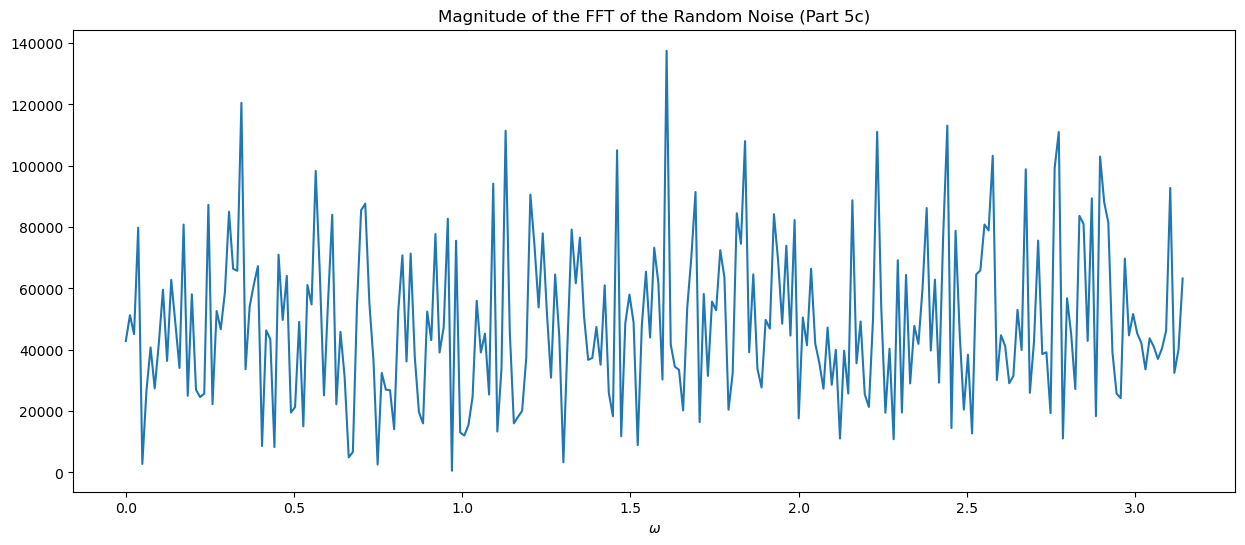

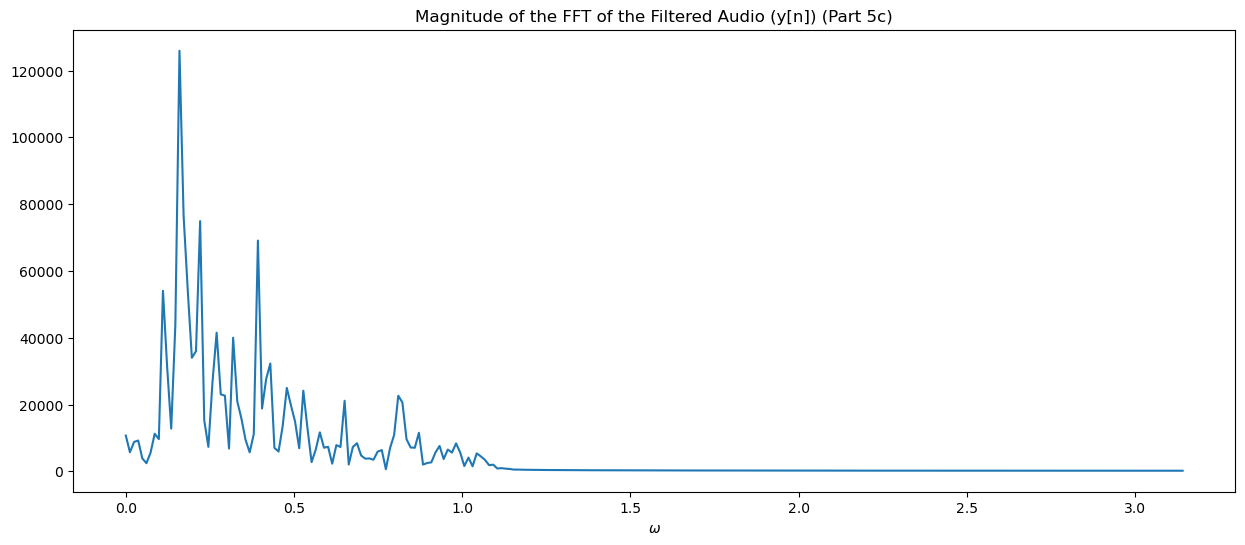

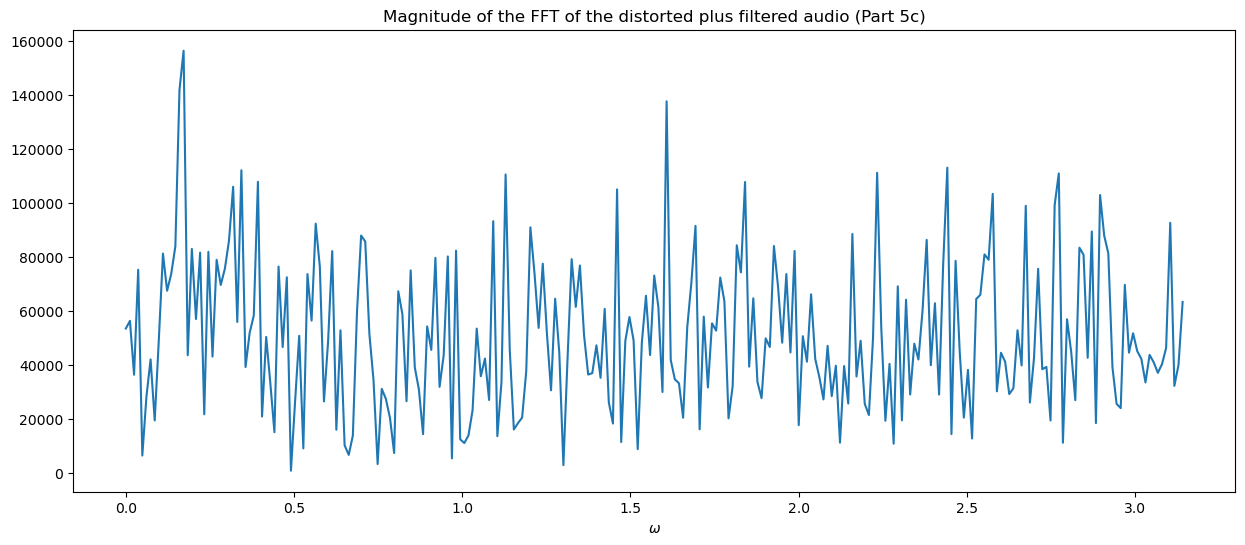

In [75]:
def wF(length):
    return np.linspace(0, np.pi, length) #quick helper function to get an axis for the frequency plots
fs,original = wavfile.read('Sound_original.wav')
#Code for 5.a:
audio_fft = np.fft.rfft(original, 512)
w = np.fft.rfftfreq(512, 1/fs)
plt.figure(figsize=(15,6))
plt.plot(w, np.abs(audio_fft))
plt.xlabel('Frequency (Hz)')
plt.title('Magnitude of the FFT of x[n] (Part 5a)') #im plotting it along analog frequencies to get a better feel of how the audio's actual fourier tranform
plt.grid(True)
plt.show()

plt.figure(figsize=(15,6))
plt.plot(wF(len(audio_fft)), np.abs(audio_fft))
plt.xlabel('Radians ($\omega$) (from 0 to $\pi$)')
plt.title('Magnitude of the FFT of x[n] (Part 5a)') #here i plotted it along digital frequencies
plt.grid(True)
plt.show()

#Code for 5.b:
desired = [1,0] #this is our desired gain from our stop bands
bands = [0,1/3 - 1/20,1/3 + 1/20,1] # here is our actual bands
N = 100 #length of the filter
filter = signal.remez(N,bands,desired,fs=2) #get our actual frequency response of our filter
fft_b = np.fft.rfft(filter, 512)
plt.figure(figsize=(15,6))
plt.plot(wF(len(fft_b)), sig2db(np.abs(fft_b)))
plt.title('Magnitude Response of the Filter (Part 5b)')
plt.xlabel('$\omega$')
plt.ylabel('dB')

#Code for 5.c:
y_n = signal.convolve(original, filter)
d = 2500 * np.random.randn(int(len(y_n)))
d_fft = np.fft.rfft(d, 512)
plt.figure(figsize=(15,6))
plt.plot(wF(len(d_fft)), np.abs(d_fft))
plt.xlabel('$\omega$')
plt.title('Magnitude of the FFT of the Random Noise (Part 5c)')

y_fft = np.fft.rfft(y_n, 512)
plt.figure(figsize=(15,6))
plt.plot(wF(len(d_fft)), np.abs(y_fft))
plt.xlabel('$\omega$')
plt.title('Magnitude of the FFT of the Filtered Audio (y[n]) (Part 5c)')

distorted_and_filtered = y_n + d
daf_fft = np.fft.rfft(distorted_and_filtered, 512)
plt.figure(figsize=(15,6))
plt.plot(wF(len(d_fft)), np.abs(daf_fft))
plt.xlabel('$\omega$')
plt.title('Magnitude of the FFT of the distorted plus filtered audio (Part 5c)')


In [71]:
Audio(data=original, rate=fs) # original audio

In [72]:
Audio(data=y_n, rate=fs) # filtered first


In [73]:
Audio(data=d, rate=fs) # distorted

In [74]:
Audio(data=distorted_and_filtered, rate=fs) # distorted + filtered

## Comments here

Comments for 5.c:
No our filtering methods was not able to seperate x[n] * h[n] from adding together that convolution with the random noise. I think it would have made more sense to add the random noise to the original audio, then filter it to see if it did a good job of removing the random noise. Regardless, I believe the audio would still be very distorted and you would still here noise since the noise was present at frequencies within the filter's range so it would not have been cancelled out.


# Submission Instructions:

Please place all files in one folder, compress that folder as a zip file, and name the zip file ``netid_labfinal``. Submit your zip file to Canvas like previous labs.